# Interpolacja

In [1]:
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting
import matplotlib as mpl        # plotting

In [2]:
import os.path 

isdir = os.path.isdir('lib_nn') # check whether 'lib_nn' exists

if not isdir:
   !git clone https://github.com/bronwojtek/lib_nn.git # cloning the library from github

import sys                     
sys.path.append('./lib_nn') 

from neural import *            # importing my library package

Invoking __init__.py for neural


## Symulowane dane

Do tej pory zajmowaliśmy się **klasyfikacją**, czyli rozpoznawaniem przez sieci, czy dany obiekt (w naszym przykładzie punkt na płaszczyźnie) ma określone cechy. Teraz przechodzimy do innego praktycznego zastosowania, a mianowicie do **interpolacji** funkcji. To zastosowanie ANN stało się bardzo popularne w analizie danych naukowych. Zilustrujemy tę metodę na prostym przykładzie, który wyjaśni podstawową ideę i pokaże, jak ona działa.

Wyobraźmy sobie, że dysponujemy pewnymi danymi eksperymentalnymi. W tym przypadku symulujemy je w sztuczny sposób, np.

In [3]:
def fi(x):
    return 0.2+0.8*np.sin(x)+0.5*x-3 # a function

def data(): 
    x = 7.*np.random.rand() # random x coordinate
    y = fi(x)+0.4*func.rn() # y coordinate = the function value + noise from [-0.2,0.2]
    return [x,y]

Powinniśmy teraz myśleć w kategoriach uczenia nadzorowanego: $x$ to "cecha", a $y$ to "etykieta".

Tablicujemy nasze zaszumione punkty danych i wykreślamy je wraz z funkcją **fi(x)**, wokół której się wahają. Jest to imitacja pomiaru eksperymentalnego, który zawsze obarczony jest pewnym błędem, tutaj naśladowanym przez losowy szum.

In [4]:
tab=np.array([data() for i in range(200)])    # data sample
features=np.delete(tab,1,1)                   # x coordinate
labels=np.delete(tab,0,1)                     # y coordinate

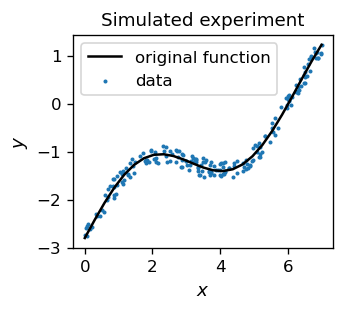

In [5]:
plt.figure(figsize=(2.8,2.3),dpi=120)

coo=np.linspace(0,7,25)

exact=[fi(x) for x in coo]

plt.plot(coo,exact,c='black',label='original function')

plt.title("Simulated experiment",fontsize=11) 
plt.scatter(features,labels,s=2,label='data')

plt.legend(prop={'size':10})

plt.xlabel('$x$',fontsize=11)
plt.ylabel('$y$',fontsize=11)
plt.show()

W języku ANN mamy zatem próbkę treningową składającą się z punktów o danych wejściowych (cechach) $x$ i "prawdziwych" danych wyjściowych (etykietach) $y$. Tak jak poprzednio, minimalizujemy funkcję błędu odpowiedniej sieci neuronowej,

$$E(\{w \}) = \sum_p (y_o^{(p)} - y^{(p)})^2. $$

Ponieważ generowane $y_o$ jest pewną (zależną od wag) funkcją $x$, metoda ta jest odmianą **dopasowania najmniejszych kwadratów**, powszechnie stosowaną w analizie danych. Różnica polega na tym, że w standardowej metodzie najmniejszych kwadratów funkcja modelu, którą dopasowujemy do danych, ma pewną prostą postać analityczną (np. $ f(x) = A + B x$), podczas gdy teraz jest to pewna "zakamuflowana" funkcja zależna od wag, dostarczona przez sieć neuronową.

## Interpolacja z pomocą ANN

Aby zrozumieć podstawową ideę, rozważmy sieć z tylko dwoma neuronami w warstwie pośredniej, z sigmoidalną funkcją aktywacji:

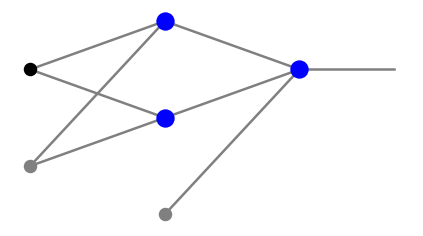

In [6]:
plt.show(draw.plot_net([1,2,1]))

Sygnały docierające do dwóch neuronów w warstwie środkowej to, w notacji z rozdz. {ref}`more-lab`,

$$ s_1^{1}=w_{01}^{1}+w_{11}^{1} x, $$

$$ s_2^{1}=w_{02}^{1}+w_{12}^{1} x, $$

a sygnały wychodzące to odpowiednio,

$$ \sigma \left( w_{01}^{1}+w_{11}^{1} x \right), $$

$$ \sigma \left( w_{02}^{1}+w_{12}^{1} x \right). $$

Zatem połączony sygnał wchodzący do neuronu wyjściowego ma postać 

$$ s_1^{2}=w_{01}^{2}+ w_{11}^{2}\sigma \left( w_{01}^{1}+w_{11}^{1} x \right)
+  w_{21}^{2}\sigma \left( w_{02}^{1}+w_{12}^{1} x \right). $$ 

Przyjmując, dla ilustracji, przykładowe wartości wag 

$$ w_{01}^{2}=0, w_{11}^{2}=1, w_{21}^{2}=-1, w_{21}^{2},
w_{11}^{1}=w_{12}^{1}=1, \, w_{01}^{1}=-x_1, \, w_{02}^{1}=-x_2, $$

gdzie $x_1$ i $x_2$ to notacja skrótowa, otrzymujemy 

$$ s_1^{2}=\sigma(x-x_1)-\sigma(x-x_2). $$

Funkcja ta jest przedstawiona na poniższym wykresie, gdzie $x_1=-1$ i $x_2=4$. 
Dąży ona do 0 w $-\infty$, potem rośnie wraz z $x$, osiągając maksimum w punkcie
$(x_1+x_2)/2$, a następnie maleje, dążąc do 0 przy $+\infty$. W punktach $x=x_1$ i $x=x_2$ jej wartości wynoszą około 0.5, można więc powiedzieć, że przedział znaczących wartości funkcji zawiera się między $x_1$ i $x_2$.

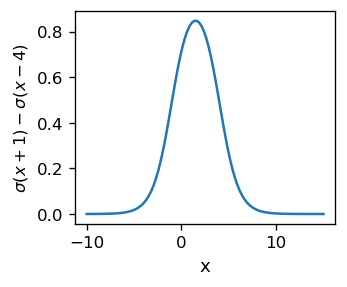

In [7]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 15, 100)

fs = [func.sig(z+1)-func.sig(z-4) for z in s]

plt.xlabel('x',fontsize=11)
plt.ylabel('$\sigma(x+1)-\sigma(x-4)$',fontsize=10)

plt.plot(s, fs)
plt.show()

Jest to prosty, ale ważny wniosek:
Jesteśmy w stanie utworzyć, za pomocą pary neuronów z sigmoidami, sygnał "garbowy", zlokalizowany wokół danej wartości, tutaj $ (x_1 + x_2) / 2 = 2$, i o danym rozrzucie rzędu $|x_2-x_1|$. Zmieniając wagi, możemy modyfikować jej kształt, szerokość i wysokość.

Można teraz pomyśleć w następujący sposób: Wyobraźmy sobie, że mamy do dyspozycji wiele neuronów w warstwie pośredniej. Możemy je łączyć w pary, tworząc garby "specjalizujące się" w określonych regionach współrzędnych. Następnie, dostosowując wysokości garbów, możemy łatwo aproksymować daną funkcję. 

W rzeczywistej procedurze dopasowania nie musimy "łączyć neuronów w pary", lecz dokonać łącznego dopasowania wszystkich parametrów jednocześnie, tak jak to miało miejsce w przypadku klasyfikatorów. Poniższy przykład przedstawia kompozycję 8 sigmoidów,

$$
f = \sigma(z+3)-\sigma(z+1)+2 \sigma(z)-2\sigma(z-4)+
      \sigma(z-2)-\sigma(z-8)-1.3 \sigma(z-8)-1.3\sigma(z-10). 
$$

Na rysunku funkcje składowe (cienkie linie oznaczające pojedyncze garby) sumują się do funkcji o dość skomplikowanym kształcie, oznaczonej grubą linią. 

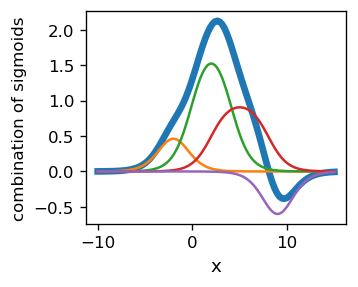

In [8]:
plt.figure(figsize=(2.8,2.3),dpi=120)

s = np.linspace(-10, 15, 100)

f1 = [func.sig(z+3)-func.sig(z+1) for z in s]
f2 = [2*(func.sig(z-0)-func.sig(z-4)) for z in s]
f3 = [func.sig(z-2)-func.sig(z-8) for z in s]
f4 = [-1.3*(func.sig(z-8)-func.sig(z-10)) for z in s]

fs = [func.sig(z+3)-func.sig(z+1)+2*(func.sig(z-0)-func.sig(z-4))+
      func.sig(z-2)-func.sig(z-8)-1.3*(func.sig(z-8)-func.sig(z-10)) 
       for z in s]

plt.xlabel('x',fontsize=11)
plt.ylabel('combination of sigmoids',fontsize=10)

plt.plot(s, fs, linewidth=4)
plt.plot(s, f1)
plt.plot(s, f2)
plt.plot(s, f3)
plt.plot(s, f4)

plt.show()

```{note}

Jeśli dopasowana funkcja jest regularna, można ją aproksymować za pomocą kombinacji liniowej sigmoidów. W przypadku większej liczby sigmoidów można uzyskać lepszą dokładność.
```

Istnieje istotna różnica między ANN używanymi do aproksymacji funkcji w porównaniu z omawianymi wcześniej klasyfikatorami binarnymi. Tam odpowiedzi były równe 0 lub 1, więc w warstwie wyjściowej stosowaliśmy skokową funkcję aktywacji, a raczej jej gładką odmianę sigmoidalną. W przypadku aproksymacji funkcji odpowiedzi stanowią zazwyczaj kontinuum w zakresie wartości funkcji. Z tego powodu w warstwie wyjściowej używamy po prostu funkcji **identycznościowej**, czyli przepuszczamy przez nią bez zmian przychodzący sygnał. Oczywiście sigmoidy pozostają w warstwach pośrednich. Wówczas wzory używane do algorytmu **backprop** z sekcji {ref}`bpa-lab` mają w warstwie wyjściowej $f_l(s)=s$. 

```{admonition} Warstwa wyjściowa dla aproksymacji funkcji
:class: important

W sieciach ANN używanych do aproksymacji funkcji, funkcja aktywacji w warstwie wyjściowej jest **identycznościowa**.
```

### Algorytm backprop dla funkcji jednowymiarowych

Weźmy architekturę

In [9]:
arch=[1,6,1]

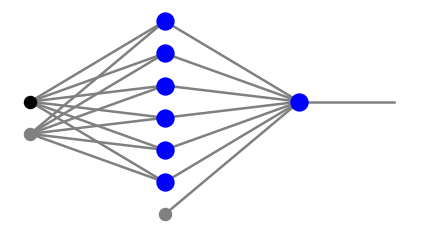

In [10]:
plt.show(draw.plot_net(arch))

i losowe wagi

In [11]:
weights=func.set_ran_w(arch, 5)

Jak właśnie wspomniano, wartość wyjściowa nie zawiera się teraz w przedziale od 0 do 1, co widać poniżej.

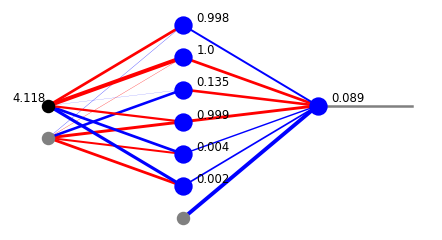

In [12]:
x=func.feed_forward_o(arch, weights,features[1],ff=func.sig,ffo=func.lin)
plt.show(draw.plot_net_w_x(arch, weights,1,x))

W module biblioteki **func** mamy funkcję dla algorytmu backprop, która pozwala na zastosowanie jednej funkcji aktywacji w warstwach pośrednich (przyjmujemy sigmoidę) i innej w warstwie wyjściowej (przyjmujemy funkcję identycznościową). Trening jest przeprowadzany w dwóch etapach: w pierwszych 30 rundach pobieramy punkty z próbki treningowej w losowej kolejności, a następnie w kolejnych 1500 rundach przecodzimy kolejno przez wszystkie punkty, zmniejszając również szybkość uczenia **eps**. Strategia ta jest jedną z wielu możliwych, ale w tym przypadku dobrze spełnia swoje zadanie.

In [13]:
eps=0.02                           # initial learning speed
for k in range(30):                # rounds
    for p in range(len(features)): # loop over the data sample points
        pp=np.random.randint(len(features)) # random point
        func.back_prop_o(features,labels,pp,arch,weights,eps,
                         f=func.sig,df=func.dsig,fo=func.lin,dfo=func.dlin)

In [14]:
for k in range(500):               # rounds
    eps=0.999*eps                  # dicrease of the learning speed
    for p in range(len(features)): # loop over points taken in sequence
        func.back_prop_o(features,labels,p,arch,weights,eps,
                         f=func.sig,df=func.dsig,fo=func.lin,dfo=func.dlin)

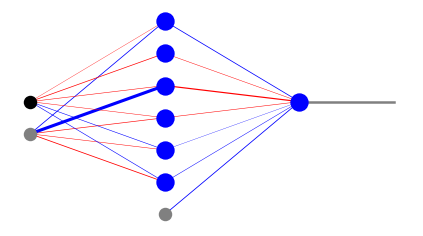

In [15]:
plt.show(draw.plot_net_w(arch,weights,.2))

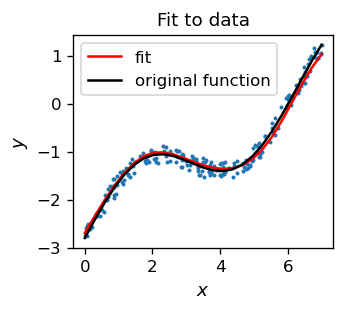

In [16]:
res=[func.feed_forward_o(arch, weights, [x], ff=func.sig, ffo=func.lin)[2][0] for x in coo]

plt.figure(figsize=(2.8,2.3),dpi=120)

plt.title("Fit to data",fontsize=11) 
plt.scatter(features,labels,s=2)


plt.plot(coo,res,c='red',label='fit');
plt.plot(coo,exact,c='black',label='original function');

plt.legend(prop={'size':10});

plt.xlabel('$x$',fontsize=11);
plt.ylabel('$y$',fontsize=11);
plt.show()

Zauważmy, że otrzymana czerwona krzywa jest bardzo bliska funkcji użytej do wygenerowania próbki danych (czarna linia). Świadczy to o tym, że aproksymacja działa poprawnie. Konstrukcja miary ilościowej (sumy najmniejszych kwadratów) jest tematem ćwiczenia.

```{note}

Funkcja aktywacji w warstwie wyjściowej może być dowolną gładką funkcją o wartościach zawierających wartości interpolowanej funkcji, niekoniecznie liniową. 
```

```{admonition} Więcej wymiarów
:class: important

Aby interpolować funkcje dwóch lub więcej argumentów, należy użyć sieci ANN z co najmniej trzema warstwami neuronów.
```
Możemy to rozumieć następująco {cite}`muller2012neural`: dwa neurony w pierwszej warstwie neuronowej mogą tworzyć garb we współrzędnej $x_1$, dwa inne - garb we współrzędnej $x_2$, i tak dalej dla wszystkich pozostałych wymiarów. Tworząc koniunkcję tych $n$ garbów w drugiej warstwie neuronów, otrzymujemy funkcję bazową specjalizującą się w obszarze wokół pewnego punktu w wielowymiarowej przestrzeni wejściowej. A zatem odpowiednio duża liczba takich funkcji bazowych może być użyta do aproksymacji w $n$ wymiarach, w pełnej analogii do przypadku jednowymiarowego.

```{tip} 
Liczba neuronów potrzebnych w procedurze aproksymacji odzwierciedla zachowanie interpolowanej funkcji. Jeśli funkcja ulega licznym znacznym wahaniom, potrzeba więcej neuronów. W jednym wymiarze jest ich zwykle co najmniej dwa razy więcej niż liczba ekstremów funkcji.

```

```{admonition} Nadmierne dopasowanie (overfitting)
:class: important

Aby uniknąć tak zwanego **problemu nadmiernego dopasowania**, danych użytych do aproksymacji musi być znacznie więcej niż parametrów sieci. W przeciwnym razie moglibyśmy dopasować bardzo dokładnie dane treningowe za pomocą funkcji "wahającej się od punktu do punktu". Jednocześnie, działanie takiej sieci na danych testowych byłoby bardzo kiepskie.
```

## Ćwiczenia

```{admonition} $~$
:class: warning

1. Dopasuj punkty danych wygenerowane przez Twoją ulubioną funkcję (jednej zmiennej) z szumem. Pobaw się architekturą sieci i wyciągnij wnioski.

2. Oblicz sumę kwadratów odległości między wartościami punktów danych treningowych a odpowiadającą im funkcją aproksymującą i wykorzystaj ją jako miarę jakości dopasowania. Sprawdź, jak liczba neuronów w sieci wpływa na wynik. 

3. Użyj sieci o większej liczbie warstw (co najmniej 3 warstwy neuronów) do dopasowania punktów danych wygenerowanych za pomocą ulubionej funkcji dwóch zmiennych. Wykonaj dwuwymiarowe wykresy konturowe dla tej funkcji oraz dla funkcji uzyskanej z sieci neuronowej i porównaj wyniki (oczywiście powinny być podobne, jeśli wszystko działa dobrze).

```